# MNIST Classification

🎯 <b><u>Exercise objectives</u></b>
- Understand the *MNIST* dataset 
- Design your first **Convolutional Neural Network** (*CNN*) and answer questions such as:
    - what are *Convolutional Layers* ? 
    - how many *parameters* are involved in such a layer ?
- Train this CNN on images

🚀 <b><u>Let's get started !</u></b>

Imagine that we are  back in time into the 90's.
You work at a *Post Office* and you have to deal with an enormous amount of letters on a daily basis. How could you automate the process of reading the ZIP Codes, which are a combination of 5 handwritten digits ? 

This task, called the **Handwriting Recognition**, used to be a very complex problem back in those days. It was solved by *Bell Labs* (among others) where one of the Deep Learning gurus, *Yann Le Cun* used to work.

From [Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition):

> Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices

![Number recognition](recognition.gif)

*Nota Bene: The animation above is just here to help you visualize what happens with the different images: <br/> $\rightarrow$ For each image, the CNN predicts what digit is written. The inputs are the different digits and not one animation/video!*

🤔 <b><u>How does this CNN work ?</u></b>

- *Inputs*: Images (_each image shows a handwritten digit_)
- *Target*: For each image, you want your CNN model to predict the correct digit (between 0 and 9)
    - It is a **multi-class classification** task (more precisely a 10-class classification task since there are 10 different digits).

🔢 To improve the capacity of the Convolutional Neural Network to read these numbers, we need to feed it with many images representing handwritten digits. This is why the 📚 [**MNIST dataset**] 📚(http://yann.lecun.com/exdb/mnist/) *(Mixed National Institute of Standards and Technology)* was created.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

📚 Tensorflow/Keras offers multiple [**datasets**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to play with:
- *Vectors*: `boston_housing` (regression)
- *Images* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (classification)
- *Texts*: `imbd`, `reuters` (classification/sentiment analysis)


💾 You can **load the MNIST dataset** with the following commands:

In [2]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

2022-03-02 21:16:26.412674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-02 21:16:26.412731: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### (1.1) Exploring the dataset

❓ **Question: Let's have look at some handwritten digits of this MNIST dataset.** ❓

🖨 Print some images from the *train set*.

<details>
    <summary><i>Hints</i></summary>

💡*Hint*: use the `imshow` function from `matplotlib` with `cmap = "gray"`

🤨 Note: if you don't specify this *cmap* argument, the weirdly displayed colors are just some arrangements done Matplotlib...
    
</details>

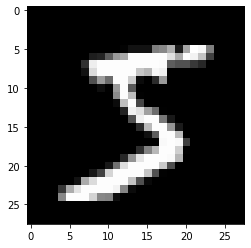

In [3]:
plt.imshow(X_train[0], cmap='gray')

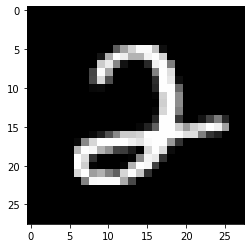

In [4]:
plt.imshow(X_train[16], cmap='gray')

### (1.2) Image Preprocessing

❗️ **Neural Networks converge faster when the input data is somehow normalized** ❗️

👩🏻‍🏫 How do we proceed for Convolutional Neural Networks ?
* The `RBG` intensities are coded between 0 and 255. 
* We can simply divide the input data by the maximal value 255 to have all the pixels' intensities between 0 and 1 😉

❓ **Question: As a first preprocessing step, please normalize your data.** ❓

Don't forget to do it both on your train data and your test data.

(*NB: you can also center your data, by substracting 0.5 from all the values, but it is not mandatory*)

In [5]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255

### (1.3) Inputs' dimensionality

❓ **Question: What is the shape of your images** ❓

In [6]:
X_train_norm.shape

(60000, 28, 28)

👆 You see that you have 60.000 training images, all of size $(28, 28)$. However...

❗️  **`Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels`** ❗️

This last dimension is clearly missing here... Can you guess the reason why ?

<details>
    <summary><i>Answer<i></summary>
        
* All these $60000$ $ 28 \times 28 $ pictures are black-and-white. $ \implies $ Each pixel lives on a spectrum from full black (0) to full white (1)
        
* Theoretically, you don't need to know the number of channels unlike colored pictures using for example:
    - the RGB system with 3 channels (<b><span style="color:red">Red</span> <span style="color:green">Green</span> <span style="color:blue">Blue</span></b>)
    - the CYMK system  with 4 channels (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Yellow</span> <span style="color:black">Black</span> </b>)
        
        
</details>        

❓ **Question: expanding dimensions** ❓

* Use the **expand_dims** to add one dimension at the end of the training data and test data.

* Then, print the shapes of `X_train` and `X_test` which should respectively be equal to  $(60000, 28, 28, 1)$ and $(10000, 28, 28, 1)$.

In [7]:
from tensorflow.keras.backend import expand_dims

In [8]:
X_trainex = expand_dims(X_train_norm)
X_testex = expand_dims(X_test_norm)

2022-03-02 21:16:29.828864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-02 21:16:29.828949: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 21:16:29.828980: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-O26C6N05): /proc/driver/nvidia/version does not exist
2022-03-02 21:16:29.829438: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X_trainex.shape

TensorShape([60000, 28, 28, 1])

### (1.4) Label encoding

A last thing to do to prepare your data is to convert your labels to "*one-hot encode*" the categories.

❓ **Question: encoding the labels** ❓ 

* Use **`to_categorical`** to transform your labels. 
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
y_train_cat.shape

(60000, 10)

The data is now ready to be used. ✅

## (2) The Convolutional Neural Network

### (2.1) Architecture and compilation of a CNN


❓ **Question: CNN Architecture and compilation** ❓

Now, let's build a <u>Convolutional Neural Network</u> that has: 


- a `Conv2D` layer with 8 filters, each of size $(4, 4)$, an input shape suitable for your task, the `relu` activation function, and `padding='same'`
- a `MaxPool2D` layer with a `pool_size` equal to $ (2, 2) $
- a second `Conv2D` layer with 16 filters, each of size $ (3, 3) $, and the `relu` activation function
- a second `MaxPool2D` layer with a `pool_size` equal to $ (2, 2) $


- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the `relu` activation function
- a last (predictive) layer that is suited for your task

In the function that initializes this model, do not forget to include the <u>compilation of the model</u>, which:
* optimizes the `categorical_crossentropy` 
* with the `adam` optimizer
* and the `accuracy` as the metrics

(*NB: you could add more classification metrics if you want but the dataset is well balanced!*)

In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [17]:
def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), activation='relu', padding='same', input_shape=(28,28,1)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

❓ **Question: number of trainable parameters in a convoluational layer** ❓ 

How many trainable parameters are there in your model?
1. Compute them with ***model.summary( )*** first
2. Recompute them manually to make sure you properly understood ***what influences the number of weights in a CNN***.

In [18]:
model = initialize_model()

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

### (2.2) Training a CNN

❓ **Question: training a CNN** ❓ 

Initialize your model and fit it on the train data. 
- Do not forget to use a **Validation Set/Split** and an **Early Stopping criterion**. 
- Limit yourself to 10 epochs max in this challenge, just to save some precious time for the more advanced challenges... !

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
es = EarlyStopping(patience=3, restore_best_weights=True)

model.fit(X_trainex, y_train_cat, batch_size=32, epochs=10, validation_split=0.3, callbacks=[es])

Epoch 1/10
1313/1313 [==============================] - 18s 13ms/step - loss: 0.4140 - accuracy: 0.8687 - val_loss: 0.1574 - val_accuracy: 0.9523
Epoch 2/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.1199 - accuracy: 0.9635 - val_loss: 0.1177 - val_accuracy: 0.9635
Epoch 3/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0898 - val_accuracy: 0.9724
Epoch 4/10
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0719 - accuracy: 0.9781 - val_loss: 0.0879 - val_accuracy: 0.9730
Epoch 5/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0781 - val_accuracy: 0.9767
Epoch 6/10
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0642 - val_accuracy: 0.9807
Epoch 7/10
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0633 -

❓ **Question: How many iterations does the CNN perform per epoch** ❓

_Note: it has nothing to do with the fact that this is a CNN. This is related to the concept of forward/backward propagation already covered during the previous lecture on optimizers, fitting and losses 😉_

<details>
    <summary><i>Answer:</i></summary>

With `verbose = 1` when fitting your model, you have access to crucial information about your training procedure.
    
Remember that we've just trained our CNN model on $60000$ images from the *train images*.

If the chosen batch size is 32: 

* For each epoch, we have $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* The _validation_split_ is equal to $0.3$ - which means that within one single epoch, there are:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches are used to compute the `train_loss` 
    * $ 1875 - 1312 = 562 $  batches are used to compute the `val_loss`
    * **The parameters are updated 1313 times per epoch** as there are 1313 forward/backward propagations per epoch !!!


👉 With so many updates of the weights within one epoch, you can understand why this CNN model converges even with a limited number of epochs.

</details>    


### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓ 

What is your **`accuracy on the test set?`**

In [22]:
performance = model.evaluate(X_testex, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.0549 - accuracy: 0.9845


In [23]:
performance

[0.05485627427697182, 0.984499990940094]

🎉 You should already be impressed by your CNN skills! Reaching over 95% accuracy!

🔥 You solved what was a very hard problem 30 years ago with your own CNN.

🏁 **Congratulations!**

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge !